In [30]:
import nibabel
import pydicom
import os
import numpy as np

In [31]:
origin_img = pydicom.dcmread('./TrainingData/healthy/ID_03bfa7fd3.dcm')

In [32]:
origin_img.pixel_array.astype(np.float32)

array([[-2000., -2000., -2000., ..., -2000., -2000., -2000.],
       [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
       [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
       ...,
       [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
       [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
       [-2000., -2000., -2000., ..., -2000., -2000., -2000.]],
      dtype=float32)

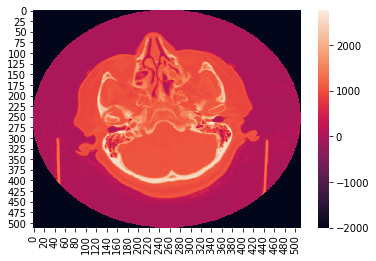

In [33]:
import seaborn as sns
img = origin_img.pixel_array
ax = sns.heatmap(img)

In [4]:

img = (img-1000)/3000
img = img*128+128

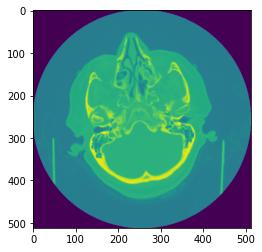

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [7]:
import torch
from torch.utils import data
import torchvision


In [44]:
import pydicom
from torchvision import transforms
import numpy as np

class DCMDatasetLoader(data.Dataset):
    def __init__(self, root):
        self.root = root
        self.classes, self.class_to_idx = self._find_classes(self.root)
        
        self.img_names = []
        self.labels = []
        for c in self.classes:
            if os.path.isdir(os.path.join(self.root, c)):
                path =os.path.join(self.root, c)
                self.img_names += os.listdir(path)
                self.labels += ([c]*len(os.listdir(path)))
        
        print("> Found %d images..." % (len(self.img_names)))
        
        self.trans = transforms.Compose([
                        transforms.ToTensor(),
                        #transforms.Normalize(mean=[128], std=[128])
                    ])

    def __len__(self):
        return len(self.img_names)
    
    def __getitem__(self, idx):
        img = pydicom.dcmread(os.path.join(self.root, self.labels[idx],self.img_names[idx]))
        img = img.pixel_array.astype(np.float32)
        img = self.trans(img)
        
        return img, self.class_to_idx[self.labels[idx]]
    
    def _find_classes(self, dir: str):
        """
        Finds the class folders in a dataset.

        Args:
            dir (string): Root directory path.

        Returns:
            tuple: (classes, class_to_idx) where classes are relative to (dir), and class_to_idx is a dictionary.

        Ensures:
            No class is a subdirectory of another.
        """
        classes = [d.name for d in os.scandir(dir) if d.is_dir()]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx


In [45]:
classes = [d.name for d in os.scandir('TrainingData/') if d.is_dir()]
classes.sort()
classes

['epidural',
 'healthy',
 'intraparenchymal',
 'intraventricular',
 'subarachnoid',
 'subdural']

In [46]:
batch_size = 1

In [47]:
train_set = DCMDatasetLoader(root='./TrainingData/')
train_loader = data.DataLoader(dataset=train_set,batch_size=batch_size,shuffle=True)

> Found 6000 images...


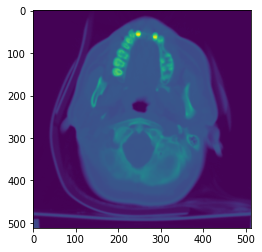

tensor([1])


In [57]:
for x, y in train_loader:
    img = x.reshape(512,512,-1)
    plt.imshow(img)
    plt.show()
    print(y)
    break

In [13]:
a = [0]
b = [1]
a*3

[0, 0, 0]